In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

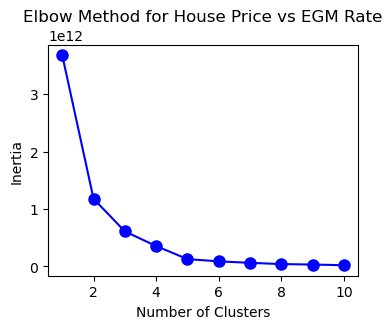

c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


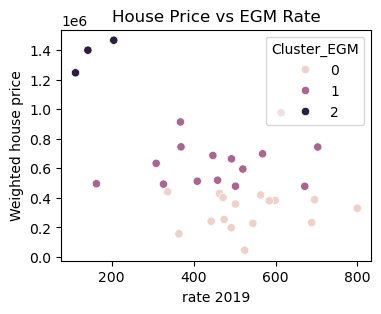

In [33]:
#Reading in the datasets
house_price_2019_df = pd.read_csv('Houses by LGA 2019.csv')
egm_rate_2019_df = pd.read_csv('EGM-rate-2019.csv')
offence_rate = pd.read_csv('Offences By LGA.csv')

HP_merge_EGM = pd.merge(house_price_2019_df, egm_rate_2019_df, on='LGA')
HP_merge_Offence = pd.merge(house_price_2019_df, offence_rate, on ='LGA')

# Elbow function to calculate optimal k-value
def plot_elbow_method(X, title):
    inertia = []
    k_values = range(1, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_) 

    # Plot the elbow curve
    plt.figure(figsize=(4, 3))
    plt.plot(k_values, inertia, 'bo-', markersize = 8)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {title}')
    plt.show()


#Applying k-means clustering to house prices vs egm rate
X_egm = HP_merge_EGM[['Weighted house price', 'rate 2019']]

# Apply elbow method on house price vs EGM rate data
plot_elbow_method(X_egm, 'House Price vs EGM Rate')

#From graph, use k = 4
kmeans_egm = KMeans(n_clusters = 3)
clusters_egm = kmeans_egm.fit_predict(X_egm)
HP_merge_EGM['Cluster_EGM'] = clusters_egm


#Plotting the house prices vs egm rate graph
plt.figure(figsize=(4,3))
sns.scatterplot(data = HP_merge_EGM, y = 'Weighted house price', x = 'rate 2019', hue = 'Cluster_EGM')
plt.title('House Price vs EGM Rate')
plt.show()

# Doesn't really make sense to apply K-means clustering, as the y-axis is dependent on x, as evidenced by a lack of correlation in any clusters.

c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

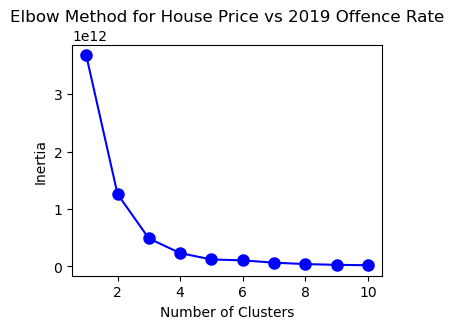

c:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


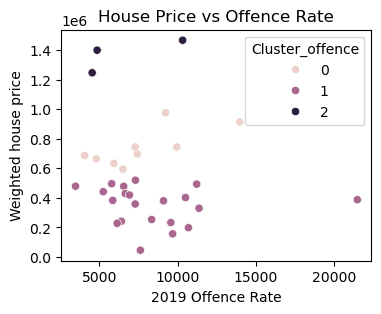

In [34]:
#K-means for offence rate
X_offence = HP_merge_Offence[['Weighted house price', '2019 Offence Rate']]

# Apply elbow method on house price vs offence rate data
plot_elbow_method(X_offence, 'House Price vs 2019 Offence Rate')

#From graph, use k = 3
kmeans_offence = KMeans(n_clusters = 3)
clusters_offence = kmeans_offence.fit_predict(X_offence)
HP_merge_Offence['Cluster_offence'] = clusters_offence


#Plotting the house prices vs offence rate graph
plt.figure(figsize=(4,3))
sns.scatterplot(data=HP_merge_Offence, y='Weighted house price', x='2019 Offence Rate', hue='Cluster_offence')
plt.title('House Price vs Offence Rate')
plt.show()